<a href="https://colab.research.google.com/github/LennyRBriones/ngc-7245-co-project/blob/improvements/ngc_7245_magnitud_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 # Mount drive
## from google.colab import drive
##drive.mount('/content/drive')

Mounted at /content/drive


# NGC-7245

## Libraries

In [1]:
import pandas as pd
import urllib.request as Req
from zipfile import ZipFile


## Get the data

In [12]:
url = "https://drive.google.com/u/0/uc?id=1zngBcuLAHpZxgnKEh31oGveHC0gzq7IA&export=download"
Req.urlretrieve(url, "dataset.zip") # Path to be download

('dataset.zip', <http.client.HTTPMessage at 0x7b4df6802740>)

In [14]:
dataset_zip = ZipFile("dataset.zip") #descompress data
dataset_zip.filelist

[<ZipInfo filename='dataset2.csv' compress_type=deflate external_attr=0x20 file_size=113574 compress_size=33022>]

In [16]:
dataset = dataset_zip.open("dataset2.csv")
df = pd.read_csv(dataset,index_col = [0]) #Always it´s neccesary modify the first column

## Dataset Exploring

In [17]:
df.head()

,Referencia,V,B-V,U-B,#ID,Referencia2,V2,V-R,R-I,V.1,...,U-Bindex,V-Rindex,R-Iindex,Teff.,BC,AbsoluteMagn..1,B-V_modificada_X,B-V_modificada_Y,Vmag,B_V
ID,,,,,,,,,,,,,,,,,,,,,
1,488.0,11.885,0.175,-0.222,NaN,NaN,NaN,NaN,NaN,11.885,...,-1.19,-0.15,-0.32,42000.0,-4.40,-5.70,0.67,7.30,12.544,2.199
2,488.0,15.233,0.664,0.348,NaN,NaN,NaN,NaN,NaN,15.233,...,-1.12,-0.15,-0.32,34000.0,-3.33,-4.50,0.69,8.50,12.466,2.200
3,488.0,11.653,0.462,0.203,3.0,537.0,11.670,0.301,0.215,11.653,...,-1.08,-0.13,-0.29,30000.0,-3.16,-4.00,0.70,9.00,12.325,2.201
4,488.0,15.353,1.019,0.659,4.0,537.0,15.335,0.617,0.485,15.353,...,-0.84,-0.10,-0.22,20900.0,-2.35,-2.45,0.76,10.55,12.278,2.201
5,488.0,14.486,0.388,0.231,5.0,537.0,14.481,0.255,0.223,14.486,...,-0.58,-0.06,-0.16,12500.0,-1.46,-1.20,0.83,11.80,12.034,2.165


In [18]:
df.tail()

,Referencia,V,B-V,U-B,#ID,Referencia2,V2,V-R,R-I,V.1,...,U-Bindex,V-Rindex,R-Iindex,Teff.,BC,AbsoluteMagn..1,B-V_modificada_X,B-V_modificada_Y,Vmag,B_V
ID,,,,,,,,,,,,,,,,,,,,,
5072,NaN,NaN,NaN,NaN,5072.0,537.0,20.907,0.880,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5073,NaN,NaN,NaN,NaN,5073.0,537.0,20.364,0.599,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5074,NaN,NaN,NaN,NaN,5074.0,537.0,17.663,0.625,0.539,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5075,NaN,NaN,NaN,NaN,5075.0,537.0,20.009,0.520,0.652,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5076,NaN,NaN,NaN,NaN,5076.0,537.0,20.533,0.604,0.596,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1820 entries, 1 to 5076
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Referencia        1183 non-null   float64
 1   V                 1183 non-null   float64
 2   B-V               1183 non-null   float64
 3   U-B               1183 non-null   float64
 4   #ID               1258 non-null   float64
 5   Referencia2       1258 non-null   float64
 6   V2                1258 non-null   float64
 7   V-R               1258 non-null   float64
 8   R-I               1231 non-null   float64
 9   V.1               1183 non-null   float64
 10  AbsoluteMagn.     23 non-null     float64
 11  B-Vindex          23 non-null     float64
 12  U-Bindex          23 non-null     float64
 13  V-Rindex          23 non-null     float64
 14  R-Iindex          23 non-null     float64
 15  Teff.             23 non-null     float64
 16  BC                23 non-null     float64


## Diagram Generation

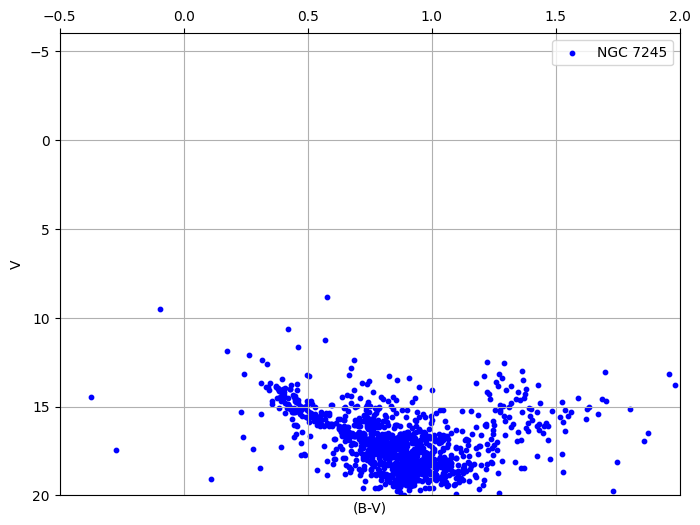

In [20]:
import matplotlib.pyplot as plt

# V & BV Data
v_magnitudes = df['V']
index_color_bv = df['B-V']

#Diagram generating
plt.figure(figsize=(8, 6))
plt.scatter(index_color_bv, v_magnitudes, marker='o', color='b',s=10, label='NGC 7245')
plt.xlabel('(B-V)')
plt.ylabel('V')
plt.gca().invert_yaxis()  # Y axis inverted
plt.gca().xaxis.tick_top()  # X axis at top
plt.grid(True)
plt.legend()

# Limits in axis X & Y
plt.xlim(-0.5,2)
plt.ylim(20, -6)

# Show graphic
plt.show()


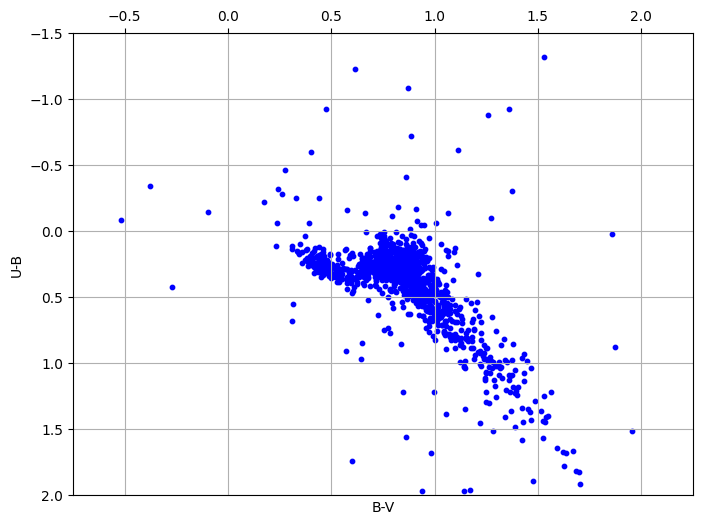

In [21]:
import matplotlib.pyplot as plt

# U-B y B-V Data

B_V = df['B-V']
U_B = df['U-B']

# Diagram U-B vs. B-V
plt.figure(figsize=(8, 6))
plt.scatter(B_V, U_B, color='blue', marker='o', s=10)
plt.xlabel('B-V')
plt.ylabel('U-B')
plt.gca().invert_yaxis()  # Y axis inverted
plt.gca().xaxis.tick_top()  # X axis at the top
plt.grid(True)

# Limits in axis X & Y
plt.xlim(-0.75,2.25)
plt.ylim(2,-1.5)
plt.show()


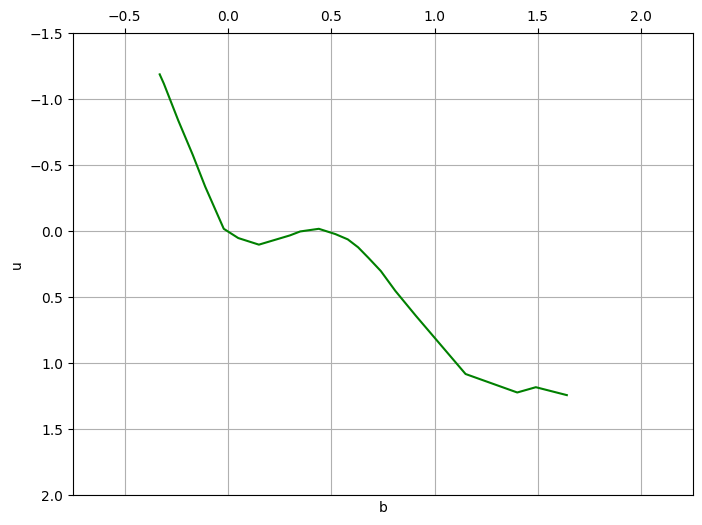

In [22]:
import matplotlib.pyplot as plt

# b & u, vindex & bindex data

u = df['U-Bindex']
b = df['B-Vindex']

# Diagram
plt.figure(figsize=(8, 6))
plt.plot(b, u, linestyle='-', color='green')
plt.xlabel('b')
plt.ylabel('u')
plt.gca().invert_yaxis()  # axis Y inverted
plt.gca().xaxis.tick_top()  # axis X at the top
plt.grid(True)

# limits ath X % Y axis
plt.xlim(-0.75,2.25)
plt.ylim(2,-1.5)

plt.show()

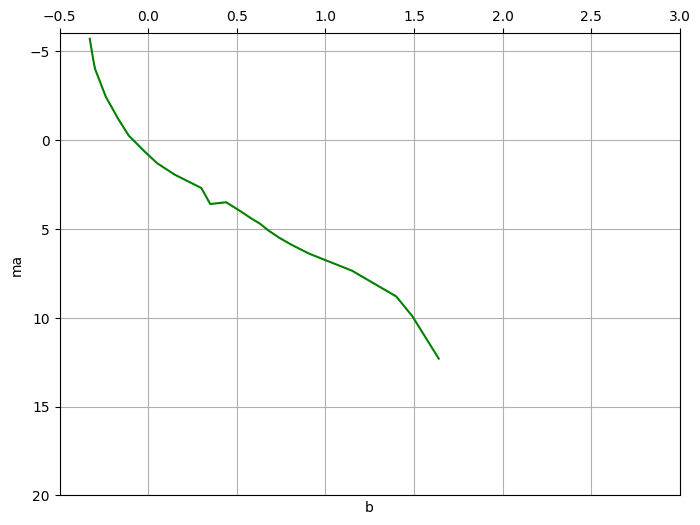

In [23]:
import matplotlib.pyplot as plt

# Datos de b y la magnitud obsoluta
ma = df['AbsoluteMagn.']
b = df['B-Vindex']
# Graficar los datos
plt.figure(figsize=(8, 6))
plt.plot(b, ma, linestyle='-', color='green')
plt.xlabel('b')
plt.ylabel('ma')
plt.gca().invert_yaxis()  # Invierte el eje Y
plt.gca().xaxis.tick_top()  # Coloca el eje X en la parte superior
plt.grid(True)

# Establece los límites en los ejes X e Y
plt.xlim(-0.5,3)
plt.ylim(20,-6)

plt.show()

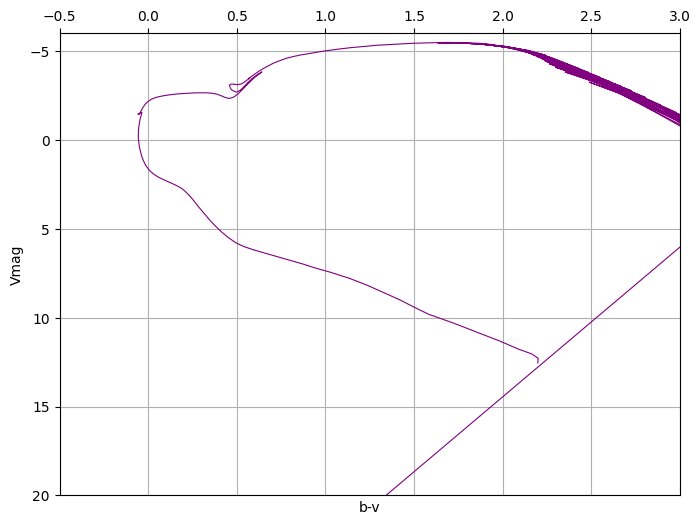

In [24]:
import matplotlib.pyplot as plt

# Datos de b-v y la Vmag
Vmag = df['Vmag']
b_v = df['B_V']
# Graficar los datos
plt.figure(figsize=(8, 6))
plt.plot(b_v, Vmag, linestyle='-', color='purple', linewidth=0.8)
plt.xlabel('b-v')
plt.ylabel('Vmag')
plt.gca().invert_yaxis()  # Invierte el eje Y
plt.gca().xaxis.tick_top()  # Coloca el eje X en la parte superior
plt.grid(True)

# Establece los límites en los ejes X e Y
plt.xlim(-0.5,3)
plt.ylim(20,-6)

plt.show()

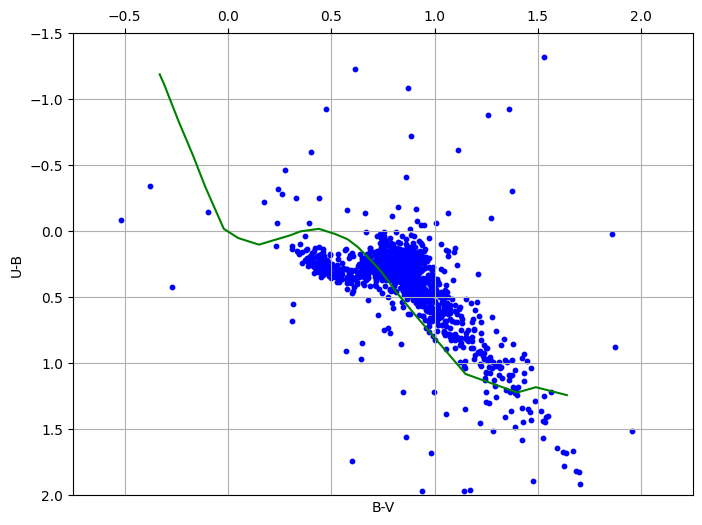

In [25]:
import matplotlib.pyplot as plt

# Datos de U-B y B-V
B_V = df['B-V']
U_B = df['U-B']
# Datos de b y u
u = df['U-Bindex']
b = df['B-Vindex']


# Gráfico
plt.figure(figsize=(8, 6))


plt.scatter(B_V, U_B, color='blue', marker='o', s=10)
plt.plot(b, u, linestyle='-', color='green')


plt.xlabel('B-V')
plt.ylabel('U-B')
plt.gca().invert_yaxis()  # Invierte el eje Y
plt.gca().xaxis.tick_top()  # Coloca el eje X en la parte superior
plt.grid(True)

# Establece los límites en los ejes X e Y
plt.xlim(-0.75,2.25)
plt.ylim(2,-1.5)
plt.show()

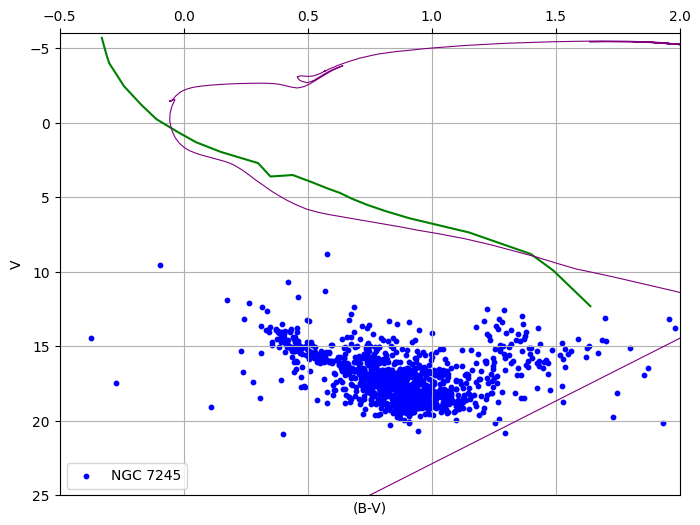

In [26]:
import matplotlib.pyplot as plt

magnitudes_V = df['V']
indices_color_BV = df['B-V']
# Datos de b y la magnitud obsoluta
ma = df['AbsoluteMagn.']
b = df['B-Vindex']
# Datos de b-v y la Vmag
Vmag = df['Vmag']
b_v = df['B_V']
#Crea el diagrama CMD
plt.figure(figsize=(8, 6))

plt.scatter(indices_color_BV, magnitudes_V, marker='o', color='b',s=10, label='NGC 7245')
plt.plot(b, ma, linestyle='-', color='green')
plt.plot(b_v, Vmag, linestyle='-', color='purple', linewidth=0.8)

plt.xlabel('(B-V)')
plt.ylabel('V')
plt.gca().invert_yaxis()  # Invierte el eje Y
plt.gca().xaxis.tick_top()  # Coloca el eje X en la parte superior
plt.grid(True)
plt.legend()

# Establece los límites en los ejes X e Y
plt.xlim(-0.5,2)
plt.ylim(25, -6)

# Muestra la gráfica
plt.show()

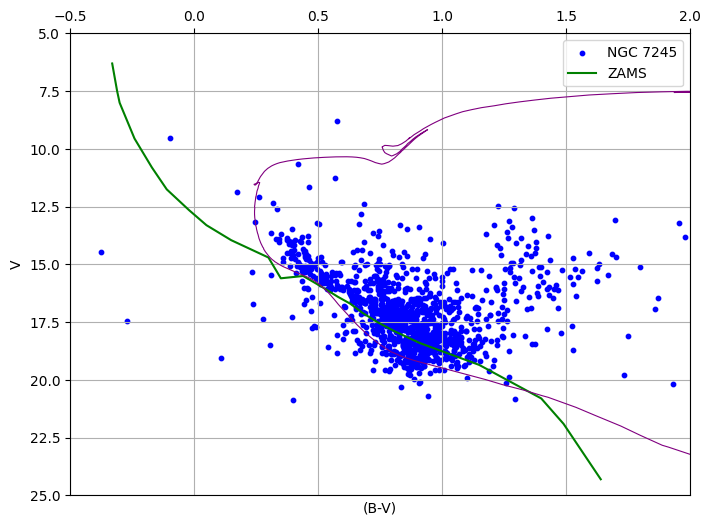

In [27]:
import matplotlib.pyplot as plt

magnitudes_V = df['V']
indices_color_BV = df['B-V']

# Datos de b y la magnitud obsoluta
ma = df['AbsoluteMagn.']
b = df['B-Vindex'
]
# Datos de b-v y la Vmag
Vmag = df['Vmag']
b_v = df['B_V']


# Resta un valor c a cada elemento de la lista b para desplazarla hacia abajo
c = 0  # Puedes ajustar este valor según el desplazamiento que desees
d = -12

e = 13
f = -0.3
b_desplazada = [val + c for val in b]
ma_desplazada = [val - d for val in ma]

Vmag_desp = [val + e for val in Vmag]
b_v_desp =  [val - f for val in b_v]

# Crea el diagrama CMD
plt.figure(figsize=(8, 6))

plt.scatter(indices_color_BV, magnitudes_V, marker='o', color='b', s=10, label='NGC 7245')
plt.plot(b_desplazada, ma_desplazada, linestyle='-', color='green', label='ZAMS')
plt.plot(b_v_desp, Vmag_desp, linestyle='-', color='purple', linewidth=0.8)

plt.xlabel('(B-V)')
plt.ylabel('V')
plt.gca().invert_yaxis()  # Invierte el eje Y
plt.gca().xaxis.tick_top()  # Coloca el eje X en la parte superior
plt.grid(True)
plt.legend()

# Establece los límites en los ejes X e Y
plt.xlim(-0.5, 2)
plt.ylim(25, 5)

# Muestra la gráfica
plt.show()


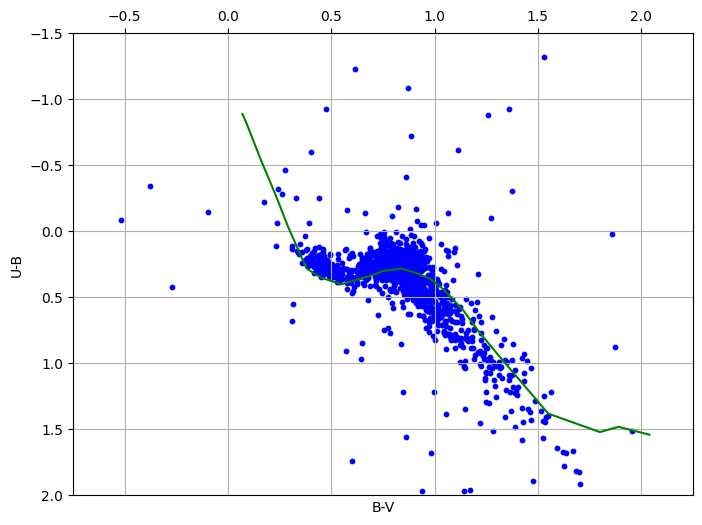

In [28]:
import matplotlib.pyplot as plt

# Datos de U-B y B-V
B_V = df['B-V']
U_B = df['U-B']

# Datos de b y u
u = df['U-Bindex']
b = df['B-Vindex']

# DSPLAZAMIENTO
i = 0.3  # Puedes ajustar este valor según el desplazamiento que desees
j = -0.4

u_desplazada = [val + i for val in u]
b_desplazada = [val - j for val in b]

# Gráfico
plt.figure(figsize=(8, 6))


plt.scatter(B_V, U_B, color='blue', marker='o', s=10, label='NGC 7245')
plt.plot(b_desplazada, u_desplazada, linestyle='-', color='green', label='Zams')


plt.xlabel('B-V')
plt.ylabel('U-B')
plt.gca().invert_yaxis()  # Invierte el eje Y
plt.gca().xaxis.tick_top()  # Coloca el eje X en la parte superior
plt.grid(True)

# Establece los límites en los ejes X e Y
plt.xlim(-0.75,2.25)
plt.ylim(2,-1.5)
plt.show()

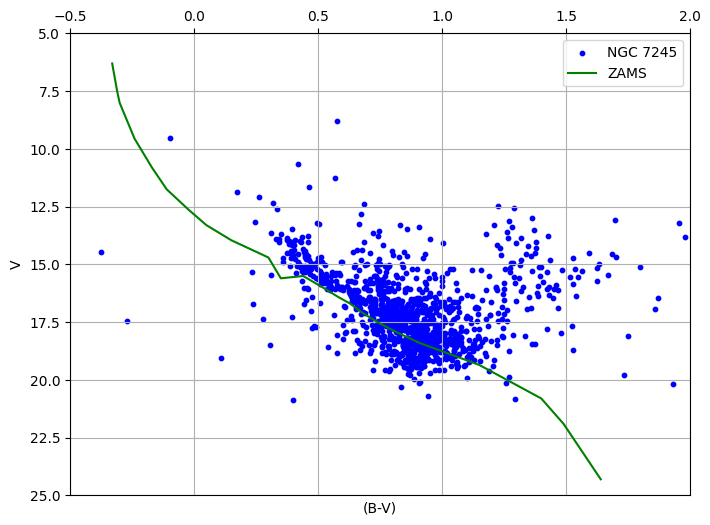

In [29]:
import matplotlib.pyplot as plt

magnitudes_V = df['V']

indices_color_BV = df['B-V']

# Datos de b y la magnitud obsoluta
ma = df['AbsoluteMagn.']
b = df['B-Vindex']

# Datos de b-v y la Vmag
Vmag = df['Vmag']
b_v = df['B_V']


# Resta un valor c a cada elemento de la lista b para desplazarla hacia abajo
c = 0  # Puedes ajustar este valor según el desplazamiento que desees
d = -12

e = 13
f = -0.3
b_desplazada = [val + c for val in b]
ma_desplazada = [val - d for val in ma]

Vmag_desp = [val + e for val in Vmag]
b_v_desp =  [val - f for val in b_v]

# Crea el diagrama CMD
plt.figure(figsize=(8, 6))

plt.scatter(indices_color_BV, magnitudes_V, marker='o', color='b', s=10, label='NGC 7245')
plt.plot(b_desplazada, ma_desplazada, linestyle='-', color='green', label='ZAMS')


plt.xlabel('(B-V)')
plt.ylabel('V')
plt.gca().invert_yaxis()  # Invierte el eje Y
plt.gca().xaxis.tick_top()  # Coloca el eje X en la parte superior
plt.grid(True)
plt.legend()

# Establece los límites en los ejes X e Y
plt.xlim(-0.5, 2)
plt.ylim(25, 5)

# Muestra la gráfica
plt.show()